In [7]:
def minArray(numbers):
        """
        :type numbers: List[int]
        :rtype: int
        """
        n = len(numbers) - 1
        
        def min_array_helper(left_idx, right_idx):
            if right_idx <= left_idx:
                return None
            mid_idx = (left_idx + right_idx) // 2
            if mid_idx < n:
                if numbers[mid_idx + 1] < numbers[mid_idx]:
                    return numbers[mid_idx + 1]
            if mid_idx > 0:
                if numbers[mid_idx] < numbers[mid_idx - 1]:
                    return numbers[mid_idx]
            
            result_l = min_array_helper(left_idx, mid_idx)
            result_r = min_array_helper(mid_idx + 1, right_idx)

            if result_l is not None:
                return result_l
            if result_r is not None:
                return result_r
            return None
        
        result = min_array_helper(0, n)
        return result if result is not None else numbers[0]

In [8]:
minArray([3,3,3,1])

1

In [ ]:
def solution(M,N):
    output = [[0] * M] * N
    i, j, m, n = 0, 0, M-1, N-1
    output[i][j] = 1
    output[m][n] = 2
    a_flag = True
    b_flag = True
    
    while i != m or j != n:
        temp_a = output[i][j]
        if a_flag:
            i -= 1 
            j += 1
            if j > N - 1:
                i += 2
                j = N - 1
                a_flag = False
            elif i < 0:
                i = 0
                a_flag = False
        else:
            i += 1
            j -= 1
            if j < 0:
                j = 0
                a_flag = True
            elif i > M - 1:
                i = M - 1
                j += 2
                a_flag = True
        if i == m and j == n:
            break
        output[i][j] = temp_a + 2
        
        temp_b = output[m][n]
        if b_flag:
            m += 1
            n -= 1
            if n < 0:
                n = 0
                m -= 2
                b_flag = False
            elif m > M - 1:
                i = m
                b_flag = False
        else:
            m -= 1
            n += 1
            if n > N - 1:
                n = N - 1
                b_flag = True
            elif m < 0:
                m = 0
                n -= 2
                b_flag = True
        if i == m and j == n:
            break
        output[m][n] = temp_b + 2
    return output
            
            
            
        
                

2.5732408950713848 4.878667880034151 1.6687745765147548


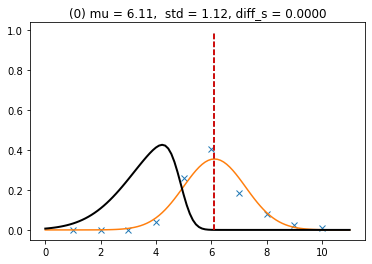

6.112903225806452
4829733.08378977 0.9999983449551306 1.5443393796944171


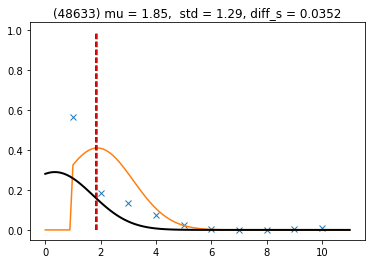

1.8805194805194805


In [10]:
%matplotlib inline
import numpy as np
import pickle
from scipy.stats import norm, skewnorm, truncnorm
import matplotlib.pyplot as plt

def sample():
    # Generate some data for this demonstration.
    data = norm.rvs(10.0, 2.5, size=500)
    print(data)

    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

def findskew():
    with open('train.pickle', 'rb') as handle:
        annotations = pickle.load(handle)

    for i, anno in enumerate(annotations):
        if anno[12] > 8:
            print(i, anno[12])

def fitsome():
    idx = np.arange(1,11,1)
    idy = np.arange(0,1,0.01)
    with open('AVA//AVA_corrected.txt', 'r') as handle:
        orig = [sum([int(l) for l in line.split()[1:]][1:11]) for line in handle]
    with open('train.pickle', 'rb') as handle:
        annotations = pickle.load(handle)
    xmin, xmax = 0, 11

    def fitone(img_id): # untruncated
        annotation = annotations[img_id][2:12]
        score = annotations[img_id][12]
        mean = score
        std = (np.sum((np.arange(1,11) * np.array(annotation) - mean) ** 2)/10) ** 0.5
        data = []
        # Recover votes
        for i in range(10):
            cnt = int(annotation[i]*orig[img_id])
            data += [i+1 for _ in range(cnt)]
        plt.plot(idx, annotation, 'x')
        mu, std = norm.fit(data)
        a, l, s = skewnorm.fit(data)
        print(a, l, s)        
        x = np.linspace(xmin, xmax, 100)
        a, b = (1 - mean) / std, (10 - mean) / std
        plt.plot(x, truncnorm.pdf(x, a, b, loc = mean, scale = std))
        p = norm.pdf(x, mu, std)
        p = skewnorm.pdf(x, a, l, s)
        plt.plot(x, p, 'k', linewidth=2)
        plt.plot([mu for _ in range(100)], idy, 'k--')
        plt.plot([score for _ in range(100)], idy, 'r--')
        title = "(%d) mu = %.2f,  std = %.2f, diff_s = %.4f" % (img_id, mu, std, score-mu)
        plt.title(title)
        plt.show()
        return score
    
    print(fitone(0))
    # exit()
    print(fitone(48633))
    # plt.show()
    # fitone(101783)
    # plt.show()
    # fitone(156972)
    # plt.show()

    # fitone(1156)
    # plt.show()
    # fitone(6534)
    # plt.show()
    # fitone(7099)
    # plt.show()

    # return None
fitsome()
        